In [72]:
bc_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
bc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Principal component analysis (PCA) identifies a hyperplane that lies closest to the data set, then projects data onto that hyperplane. This projection seeks to minimize the information loss.

A *principal component* is a unit vector that minimizes mean-squared distance between data and their projection.

PCA uses singular value decomposition to compute these components:$X = U\cdot \Sigma \cdot V^T$, where $V$ is the principal component matrix.

In [74]:
# Center the data
X_c = X - X.mean(axis=0)
# Decompose. Vt is the component matrix.
U, s, Vt = np.linalg.svd(X_c)
V = Vt.T
v0 = V[:,0]
v1 = V[:,1]

We project onto a d-dimensional hyperplane by passing the centered training data through: $X' = X\cdot W_d$, where $W_d=[v_0 \ v_1 \ \cdots \ v_d]$

In [75]:
# Project into 2 dimensions for a scatterp plot
Wd = np.array([v0,v1]).T
X_prime = X_c.dot(Wd)
X_prime[0]
# Note: using linear algebra operations is flipping the sign of v0! Need to investigate.

array([-1160.1425737 ,  -293.91754364])

The sklearn library does this operation within the decomposition package. It also provides other attributes, such as the variance ratios.

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

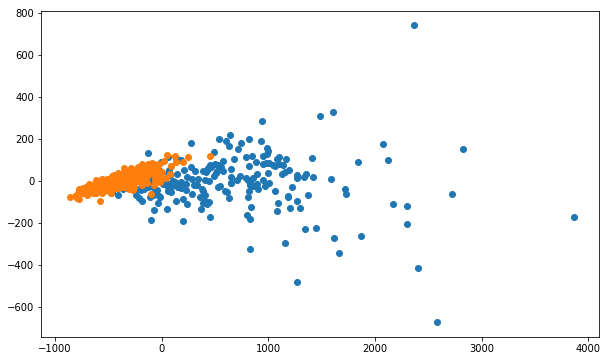

In [102]:
X2_targ0 = X_2[y==0]
X2_targ1 = X_2[y==1]
plt.figure(figsize=(10,6))
plt.scatter(X2_targ0[:,0], X2_targ0[:,1])
plt.scatter(X2_targ1[:,0], X2_targ1[:,1])
plt.show()

The projection of the data looks pretty good, but it may be too compressed. Let's look at a 3d mapping.